In [52]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi
import pandas as pd
from fractions import Fraction
# Create QuantumCircuit with n_count counting qubits plus 4 qubits for U
n_count = 8 # number of counting qubits
a = 7 # a variable that can be adjusted later
# The first 8-qubit register for storing x
qr1 = QuantumRegister(n_count, name="q1")
# The second 4-qubit register for storing f(x)
qr2 = QuantumRegister(4, name="q2")
cr1 = ClassicalRegister(n_count, name="c1")
cr2 = ClassicalRegister(4, name="c2")

# un-comment the line below to observe the second register
# qc = QuantumCircuit(qr1, qr2, cr1, cr2)

# comment the line below to observe the second register
qc = QuantumCircuit(qr1, qr2, cr1)

def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

def qft(n):
    """n-qubit QFT the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circuit"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

# Initialize counting qubits in uniform superposition
for q in range(n_count):
    qc.h(q)
# And ancilla register in state |1>
qc.x(3+n_count)
# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q),
    [q] + [i+n_count for i in range(4)])

# un-comment the line below to observe the second register
# qc.measure(qr2, cr2)
# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))
# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw()

┌───┐                                                            »
q1_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
q1_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
q1_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
q1_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
q1_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q1_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q1_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
q1_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
q2_0: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
q2_1: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q2_2: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q2_3: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
c1: 8/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
«q1_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
«q1_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
«q1_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
«q1_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
«q1_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
«q1_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
«q1_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
«q1_7: ───────┼───────────────┼───────────────┼────────────────■────────»
«      ┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐»
«q2_0: ┤0             ├┤0             ├┤0             ├┤0              ├»
«      │              ││              ││              ││               │»
«q2_1: ┤1             ├┤1             ├┤1             ├┤1              ├»
«      │  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │»
«q2_2: ┤2             ├┤2             ├┤2             ├┤2              ├»
«      │              ││              ││              ││               │»
«q2_3: ┤3             ├┤3             ├┤3             ├┤3              ├»
«      └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
«c1: 8/═════════════════════════════════════════════════════════════════»
«                                                                       »
«      ┌──────┐┌─┐                   

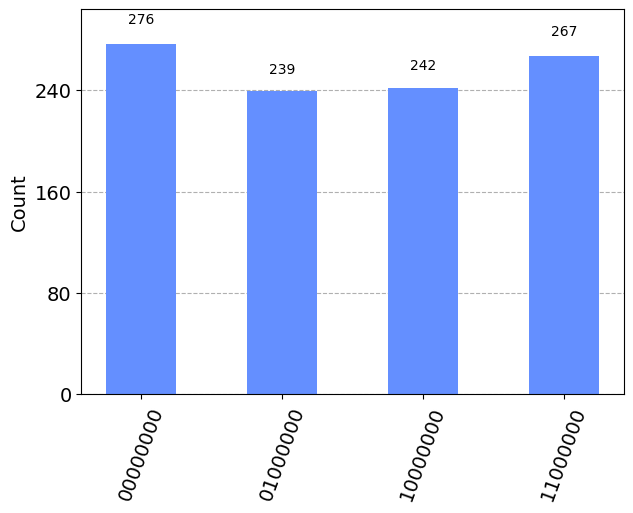

In [53]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)


In [54]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2) # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.25      1/4            4
2   0.50      1/2            2
3   0.00      0/1            1
